# Analysis of Electric Vehicle market in India

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Loading dataset 1
df1=pd.read_csv('Indian automoble buying behavour study 1.0.csv')
df1.sample(5)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
60,28,Salaried,Single,Post Graduate,0,No,No,No,1400000,0,1400000,City,1200000
85,42,Business,Married,Post Graduate,3,Yes,Yes,No,1800000,0,1800000,Baleno,700000
31,41,Salaried,Married,Graduate,3,No,No,Yes,1400000,700000,2100000,Duster,1300000
63,31,Salaried,Married,Post Graduate,3,Yes,Yes,No,1800000,0,1800000,Baleno,700000
44,34,Salaried,Married,Post Graduate,2,Yes,Yes,No,1600000,0,1600000,i20,800000


In [3]:
# dataset 2
df2=pd.read_csv('EV Stats-1.csv')
df2.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431.0,692.0,4689.0,0,0.0,3680.0,0.0,9492.0
1,2,Assam,463.0,138.0,1006.0,0,117.0,151.0,0.0,1875.0
2,3,Bihar,252.0,430.0,2148.0,6,64.0,271.0,0.0,3171.0
3,4,Chhattisgarh,613.0,382.0,2078.0,58,106.0,997.0,0.0,4234.0
4,5,Delhi,1395.0,251.0,5018.0,0,1.0,12695.0,21.0,19381.0


In [4]:
# dataset 3
df3=pd.read_excel('3_ev_market_india_dataset.xlsx')
df3

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [5]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)

DF1 Shape:  (99, 13)
DF2 Shape:  (35, 10)
DF3 Shape:  (103, 14)


In [6]:
# checking the info of the datasets (columns, datatypes, nulls)
print('Information about DATASET 1')
display(df1.info())

print('Information about DATASET 2')
display(df2.info())

print('Information about DATASET 3')
display(df3.info())

Information about DATASET 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


None

Information about DATASET 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Sl. No                                                              34 non-null     object 
 1   State                                                               34 non-null     object 
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  31 non-null     float64
 3   Two Wheelers (Category L2 (CMVR))                                   31 non-null     float64
 4   Two Wheelers (Max power not exceeding 250 Watts)                    31 non-null     float64
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 34 non-null     object 
 6   Three Wheelers (Category L5 as per CMVR)                            31 non-null     floa

None

Information about DATASET 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


None

In [7]:
# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
display('DATASET 1', d1, 'DATASET 2', d2, 'DATASET 3', d3)

'DATASET 1'

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


'DATASET 2'

,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1777.354839,907.677419,7260.516129,46.451613,6811.032258,1.741935,16829.870968
std,5000.160994,2518.917378,20008.445495,131.491150,18941.726543,6.016465,46327.212405
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,22.000000,19.000000,94.000000,0.000000,236.500000,0.000000,665.000000
50%,463.000000,228.000000,2148.000000,1.000000,997.000000,0.000000,4234.000000
75%,1089.500000,767.500000,6639.000000,37.500000,5487.500000,0.000000,14951.500000
max,27549.000000,14069.000000,112538.000000,720.000000,105571.000000,27.000000,260863.000000


'DATASET 3'

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


### Exploratory Data Analysis

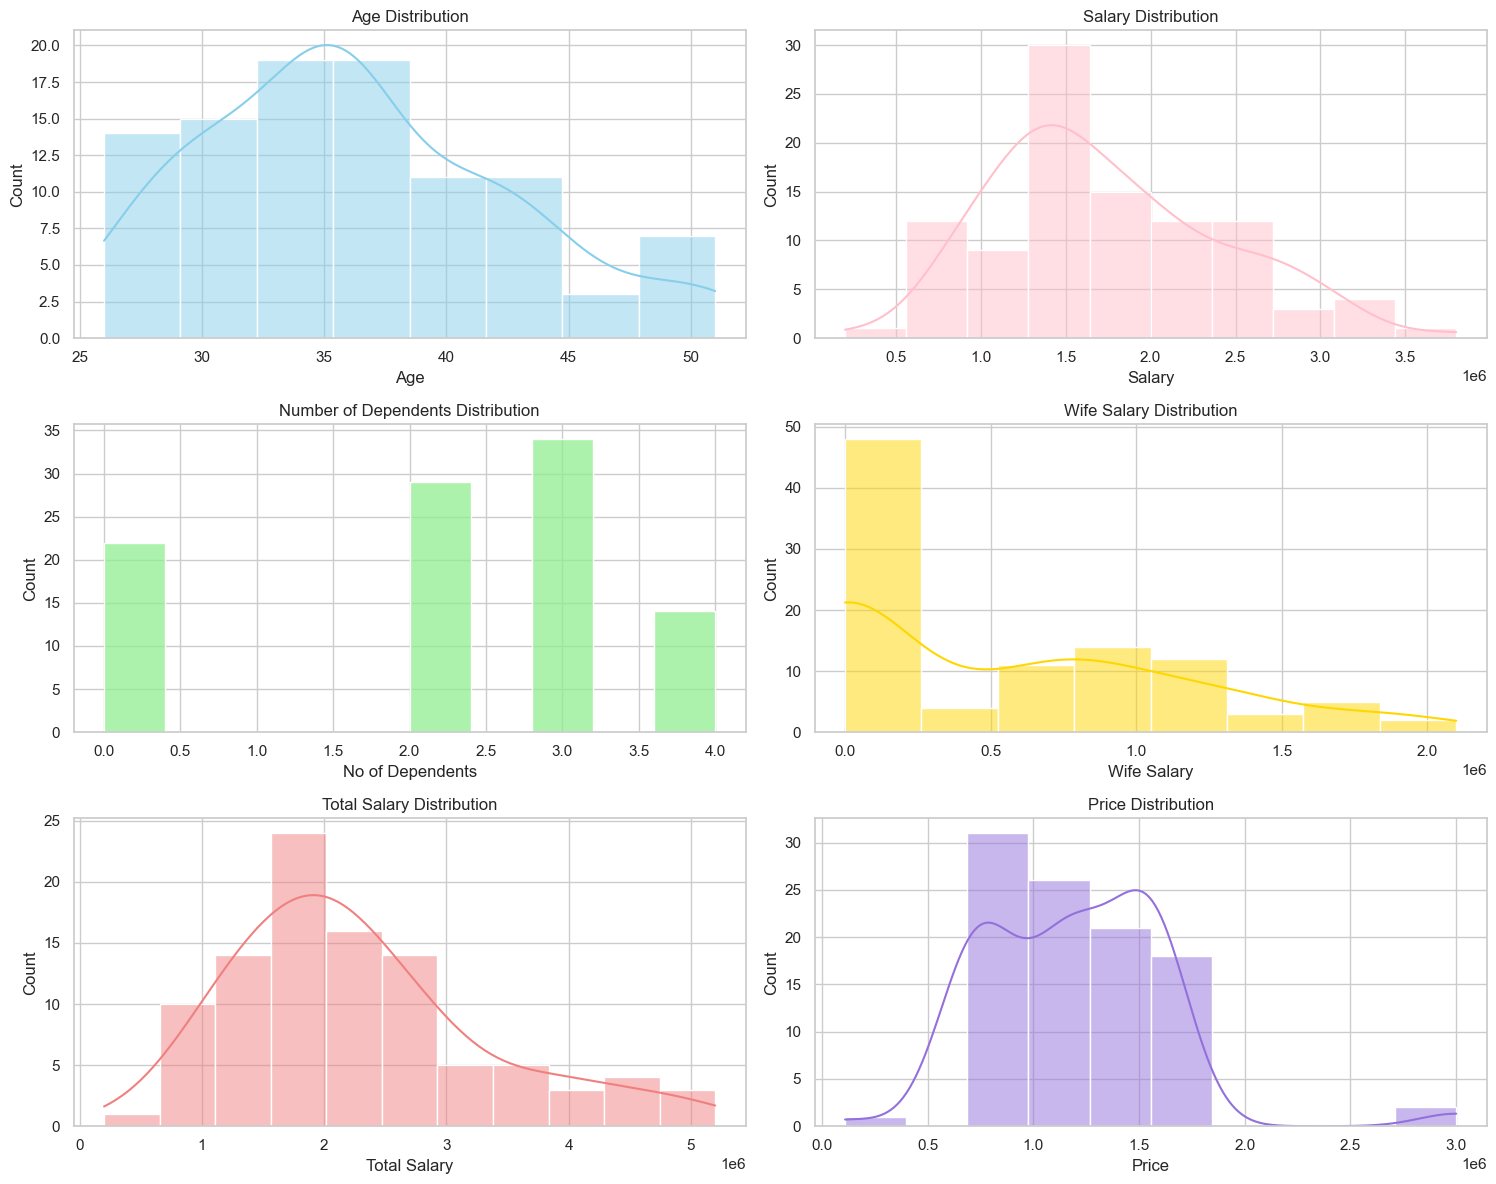

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of numerical columns
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# Age distribution
sns.histplot(df1['Age'], kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Age Distribution')

# Salary distribution
sns.histplot(df1['Salary'], kde=True, ax=axs[0, 1], color='pink')
axs[0, 1].set_title('Salary Distribution')

# No of Dependents distribution
sns.histplot(df1['No of Dependents'], kde=False, ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Number of Dependents Distribution')

# Wife Salary distribution
sns.histplot(df1['Wife Salary'], kde=True, ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Wife Salary Distribution')

# Total Salary distribution
sns.histplot(df1['Total Salary'], kde=True, ax=axs[2, 0], color='lightcoral')
axs[2, 0].set_title('Total Salary Distribution')

# Price distribution
sns.histplot(df1['Price'], kde=True, ax=axs[2, 1], color='mediumpurple')
axs[2, 1].set_title('Price Distribution')

plt.tight_layout()
plt.show()


#### The age distribution of potential EV car buyers

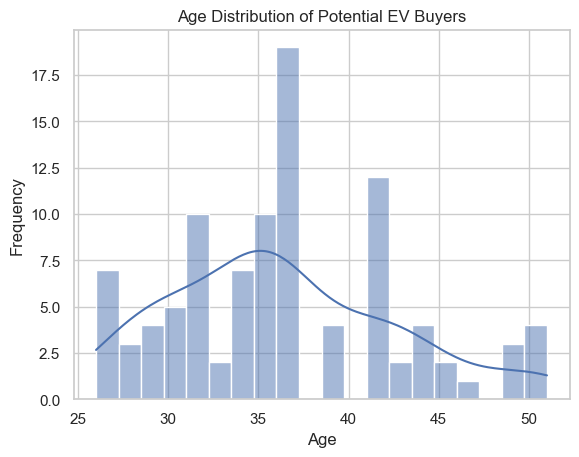

In [40]:
# Plotting age distribution
sns.histplot(df1['Age'], kde=True, bins=20)
plt.title('Age Distribution of Potential EV Buyers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


#### Conclusion: 

          Here the age group of 36-38 and 43 are the potential EV car buyers in India.

#### Does profession influence EV car purchasing decisions?

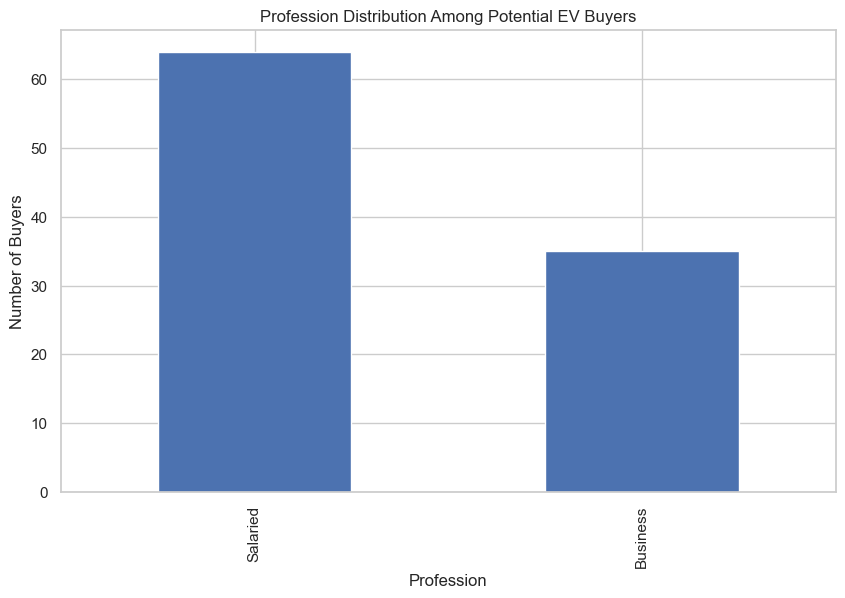

In [10]:
# Count of each profession
profession_counts = df1['Profession'].value_counts()

# Plotting profession distribution
profession_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Profession Distribution Among Potential EV Buyers')
plt.xlabel('Profession')
plt.ylabel('Number of Buyers')
plt.show()


#### Conclusion:
            
           Here From the Count plot we can see that the salaried profession more influences the decision making of EV cars.

#### Relationship between marital status and EV car purchasing 

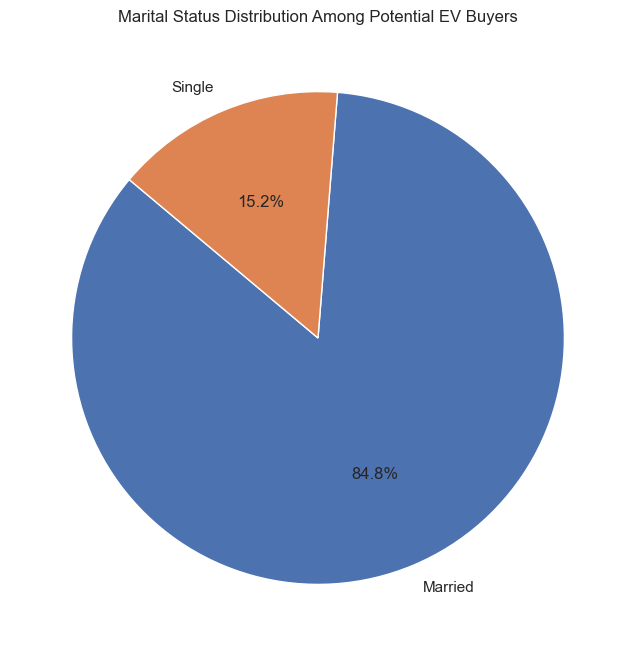

In [11]:
# Count of marital status
marital_status_counts = df1['Marrital Status'].value_counts()

# Plotting marital status distribution
marital_status_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140)
plt.title('Marital Status Distribution Among Potential EV Buyers')
plt.ylabel('')
plt.show()


#### Conclusion:

       From the above pie chart we can see that married peoples are having more tendency to buy a EV car than that of single peoples.

#### Education level correlation with the preference for EV cars

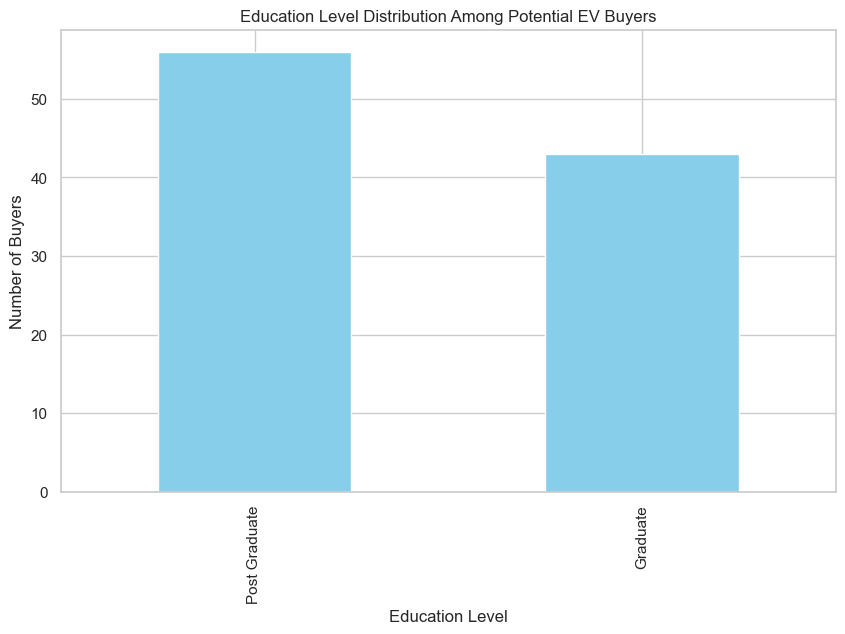

In [12]:
# Count of education levels
education_counts = df1['Education'].value_counts()

# Plotting education level distribution
education_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Education Level Distribution Among Potential EV Buyers')
plt.xlabel('Education Level')
plt.ylabel('Number of Buyers')
plt.show()


#### Does the presence of a working spouse impact the decision to purchase an EV?

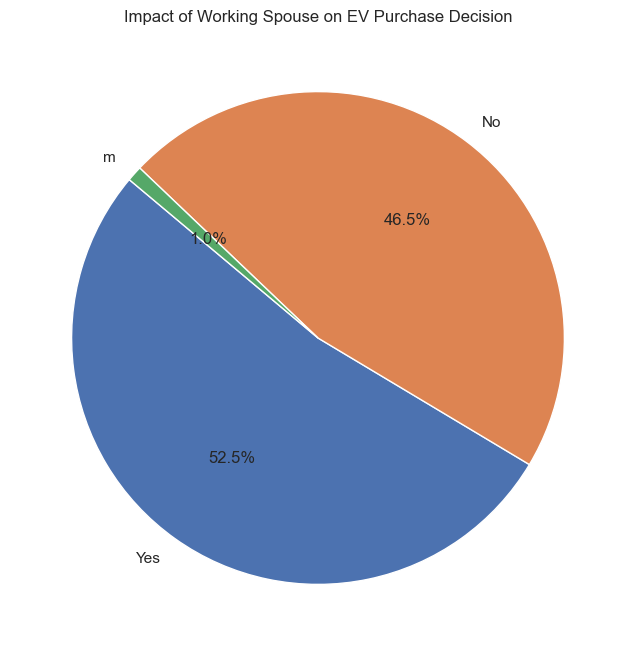

In [13]:
# Count of working spouse
wife_working_counts = df1['Wife Working'].value_counts()

# Plotting working spouse distribution
wife_working_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140)
plt.title('Impact of Working Spouse on EV Purchase Decision')
plt.ylabel('')
plt.show()


#### Conclusion:
    
    From the above pie chart we can say that the presenc of Working Spouse impact the decision of  purchasing an EV.

#### Available Electric Vehicles of Different Number of Seats in India

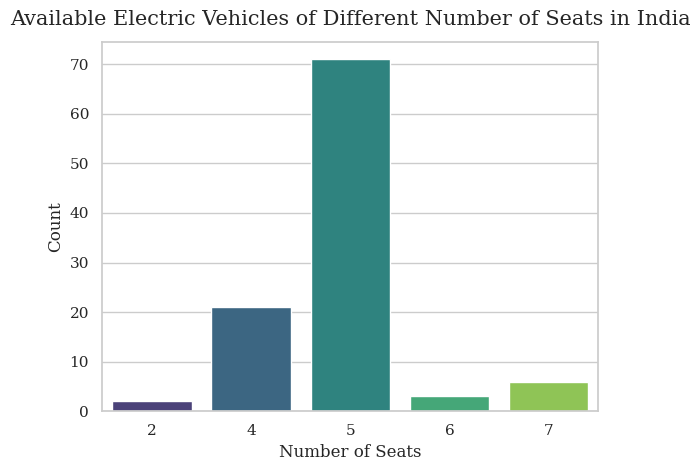

In [14]:
sns.countplot(data=df3, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

#### Personal loans and house loans influence EV car purchasing

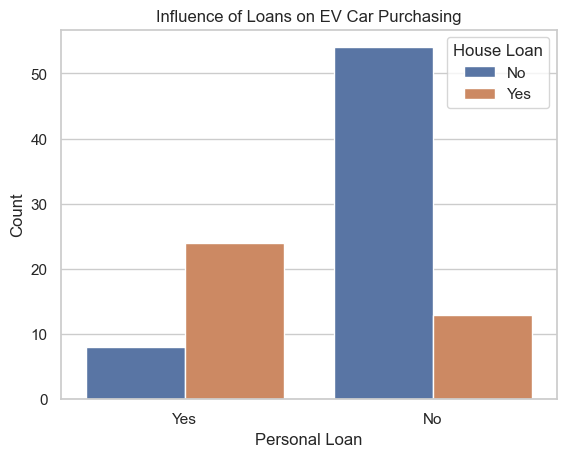

In [15]:
# Countplot for personal loan vs house loan
sns.countplot(x='Personal loan', hue='House Loan', data=df1)
plt.title('Influence of Loans on EV Car Purchasing')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.legend(title='House Loan')
plt.show()


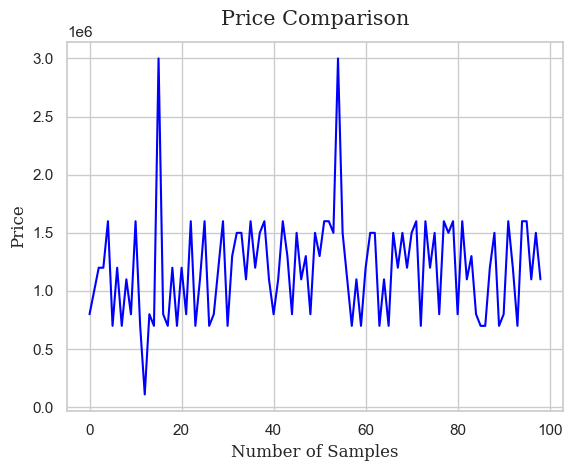

In [16]:
import matplotlib.pyplot as plt

# Create the plot
plt.plot(df1['Price'], color='blue')

# Customize font properties
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12)

# Show the plot
plt.show()


####  The correlation between the total household income and the price of the EV car purchased

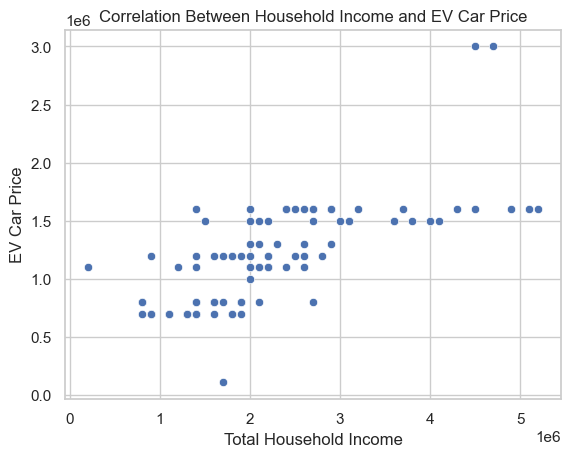

In [17]:
# Scatter plot for Total Salary vs. Price
sns.scatterplot(x='Total Salary', y='Price', data=df1)
plt.title('Correlation Between Household Income and EV Car Price')
plt.xlabel('Total Household Income')
plt.ylabel('EV Car Price')
plt.show()

#### The distribution of EV vehicles across top 5 different states 

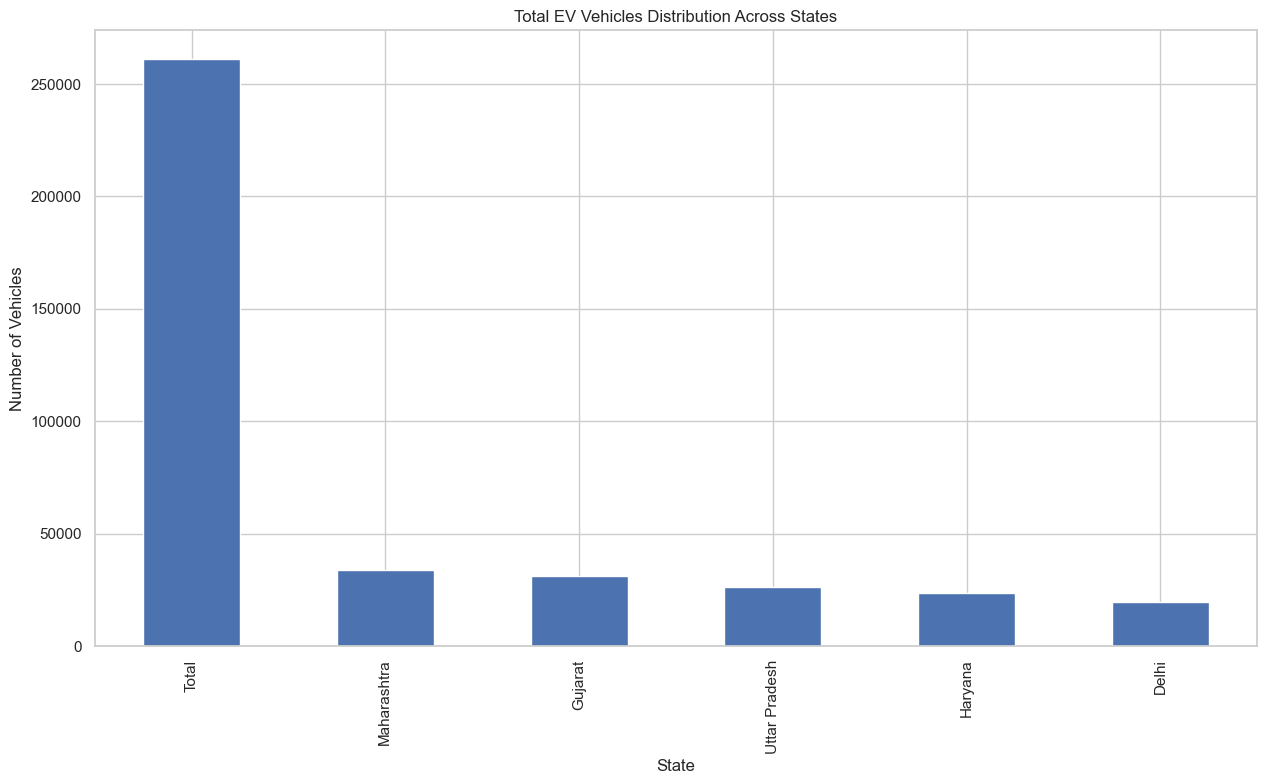

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting total vehicles by state
df2.groupby('State')['Total in state'].sum().sort_values(ascending=False).head(6).plot(kind='bar', figsize=(15, 8))
plt.title('Total EV Vehicles Distribution Across States')
plt.xlabel('State')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.show()


#### State-wise Distribution of Two Wheelers, Three Wheelers, and Passenger Cars

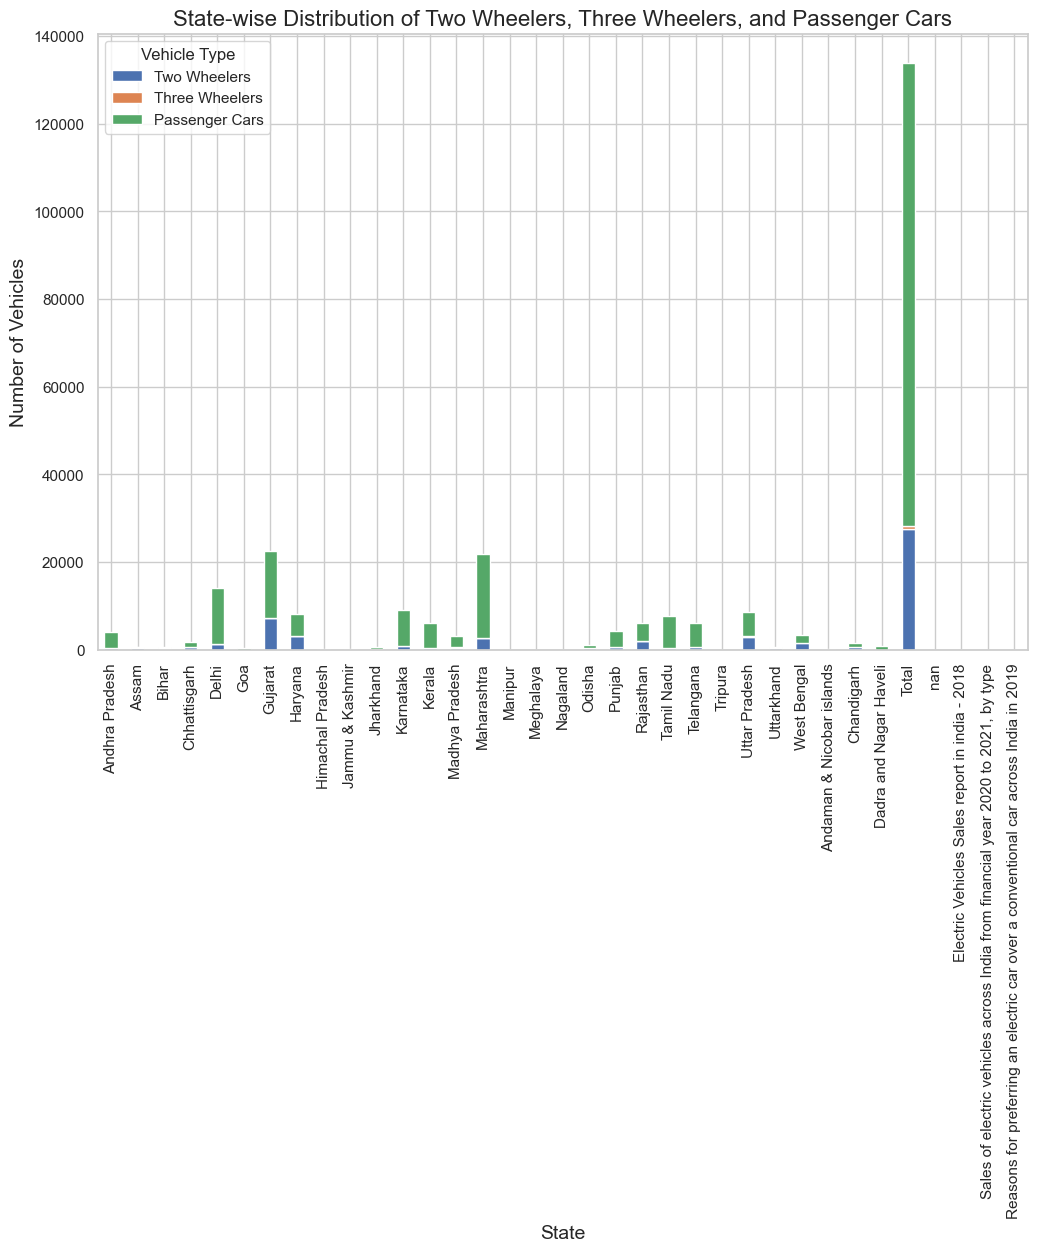

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the relevant columns for visualization
vehicle_columns = ['State', 
                   'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', 
                   'Three Wheelers (Category L5 as per CMVR)', 
                   'Passenger Cars (Category M1 as per CMVR)']

# Subset the data
df2_vehicle = df2[vehicle_columns]

# Renaming columns for better readability in the plot
df2_vehicle.columns = ['State', 'Two Wheelers', 'Three Wheelers', 'Passenger Cars']

# Set the index to 'State' for easy plotting
df2_vehicle.set_index('State', inplace=True)

# Plotting the stacked bar chart
df2_vehicle.plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding title and labels
plt.title('State-wise Distribution of Two Wheelers, Three Wheelers, and Passenger Cars', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)

# Displaying the plot
plt.xticks(rotation=90)
plt.legend(title="Vehicle Type")
plt.show()


#### The registrations of two-wheelers, three-wheelers, and four-wheelers vary across states

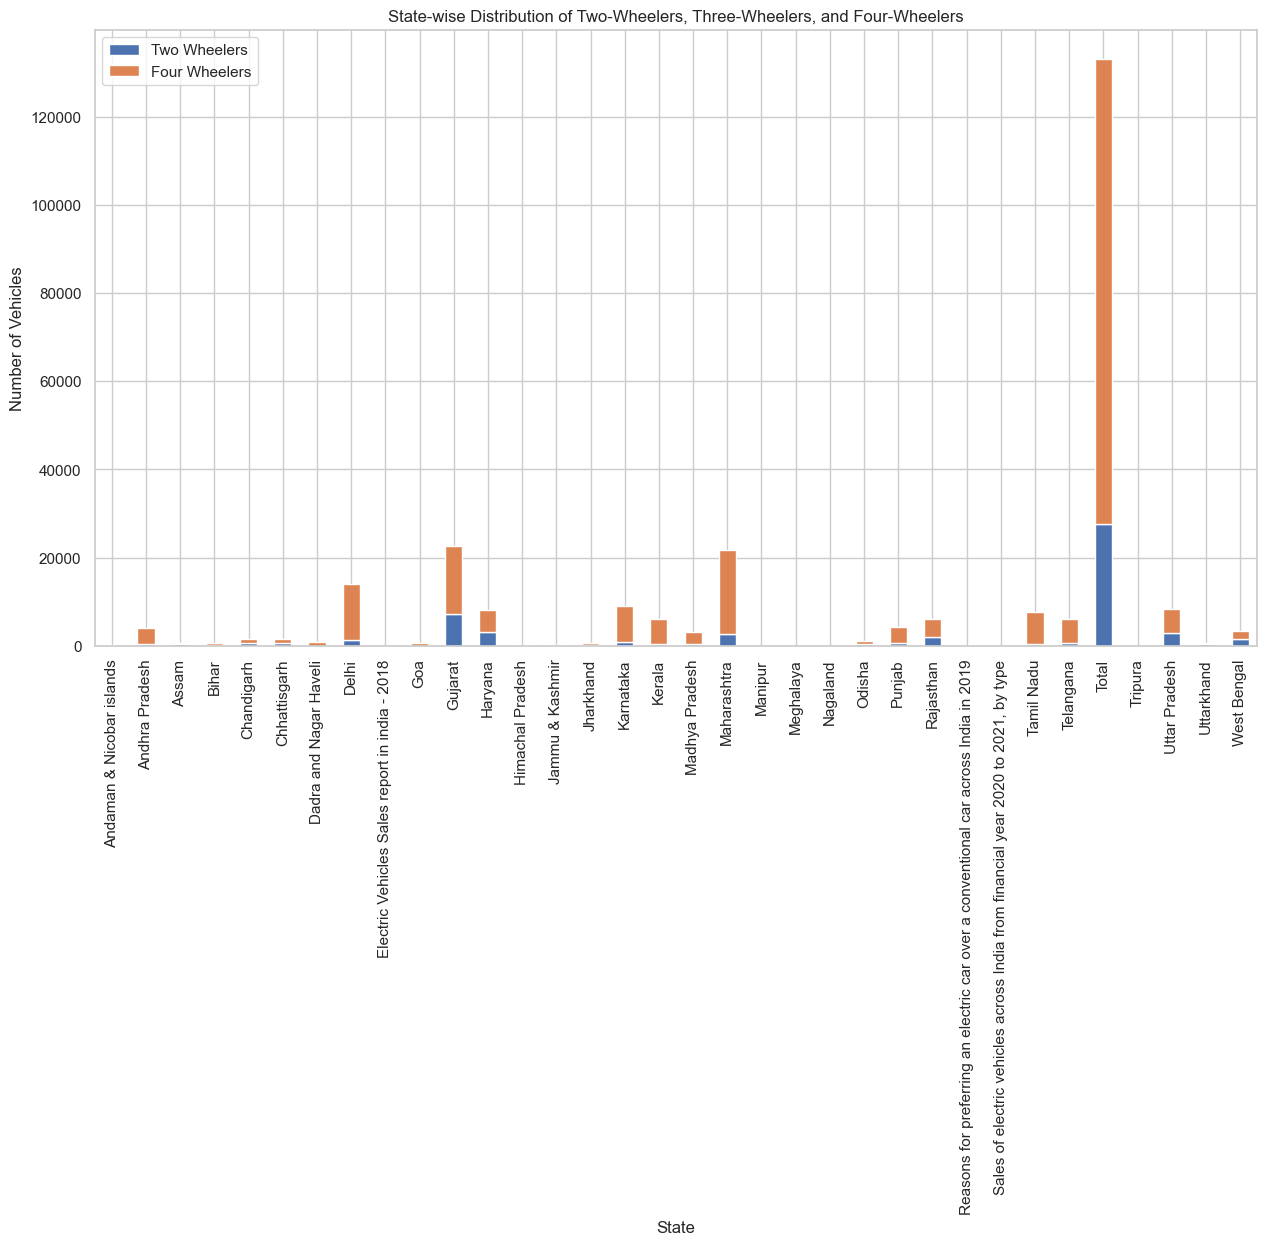

In [20]:
# Aggregating two-wheelers, three-wheelers, and four-wheelers by state
state_wise_vehicles = df2.groupby('State')[[
    'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
    'Three Wheelers (Category L5 slow speed as per CMVR)',
    'Passenger Cars (Category M1 as per CMVR)'
]].sum().reset_index()

# Renaming columns for easier understanding
state_wise_vehicles.columns = ['State', 'Two Wheelers', 'Three Wheelers', 'Four Wheelers']

# Plotting state-wise distribution
state_wise_vehicles.set_index('State').plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('State-wise Distribution of Two-Wheelers, Three-Wheelers, and Four-Wheelers')
plt.xlabel('State')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.show()


#### States have the highest adoption of passenger cars (four-wheelers)

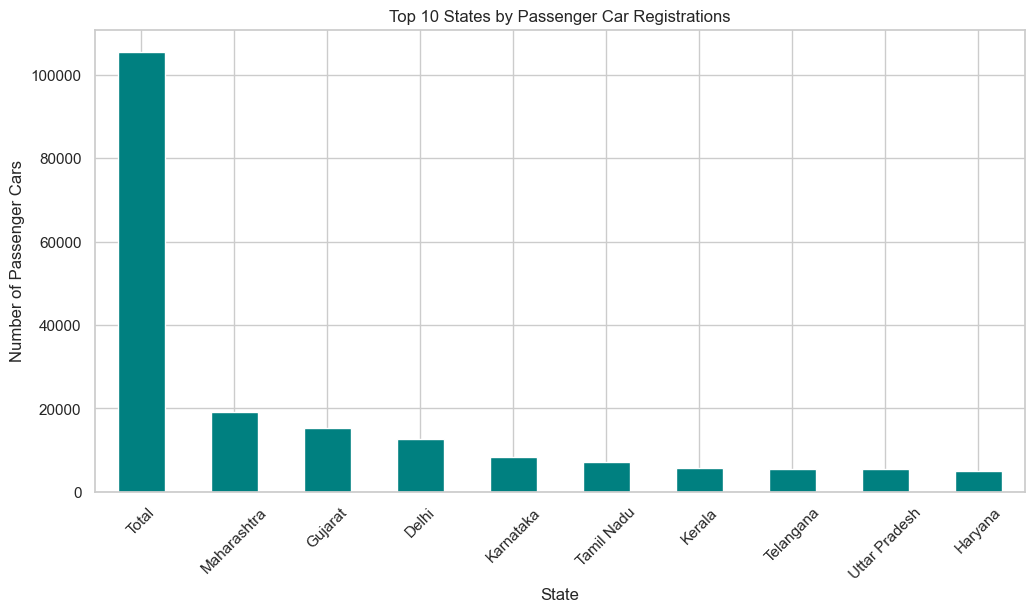

In [21]:
# Sorting states by passenger car registrations
passenger_cars = df2.groupby('State')['Passenger Cars (Category M1 as per CMVR)'].sum().sort_values(ascending=False)

# Plotting top states by passenger car registrations
passenger_cars.head(10).plot(kind='bar', color='teal', figsize=(12, 6))
plt.title('Top 10 States by Passenger Car Registrations')
plt.xlabel('State')
plt.ylabel('Number of Passenger Cars')
plt.xticks(rotation=45)
plt.show()


#### The state-wise distribution of commercial EVs (e.g., buses)

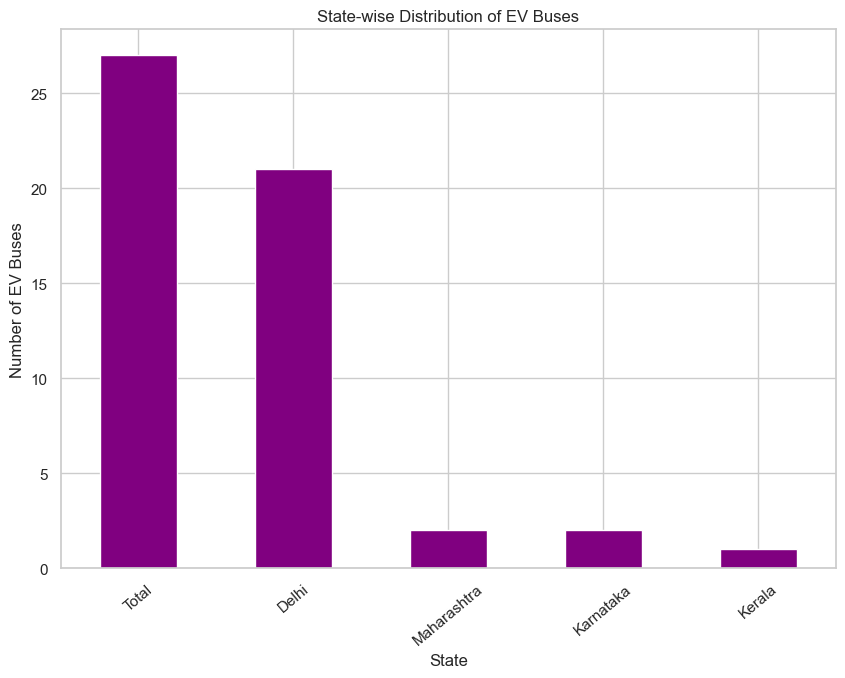

In [22]:
# Plotting the number of EV buses by state
df2.groupby('State')['Buses'].sum().sort_values(ascending=False).head(5).plot(kind='bar', color='purple', figsize=(10, 7))
plt.title('State-wise Distribution of EV Buses')
plt.xlabel('State')
plt.ylabel('Number of EV Buses')
plt.xticks(rotation=40)
plt.show()

#### The most preferred EV brand among different consumer segments

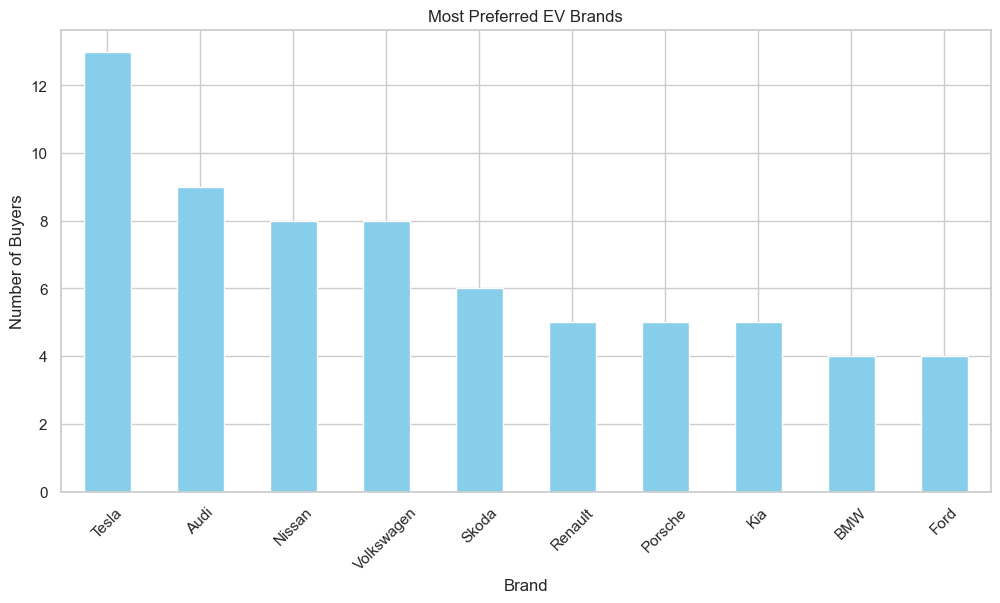

In [23]:
# Count of EV brands in df3
brand_counts = df3['Brand'].value_counts().head(10)

# Plotting the most preferred EV brands
brand_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Most Preferred EV Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45)
plt.show()


#### The most popular body styles among EV buyers

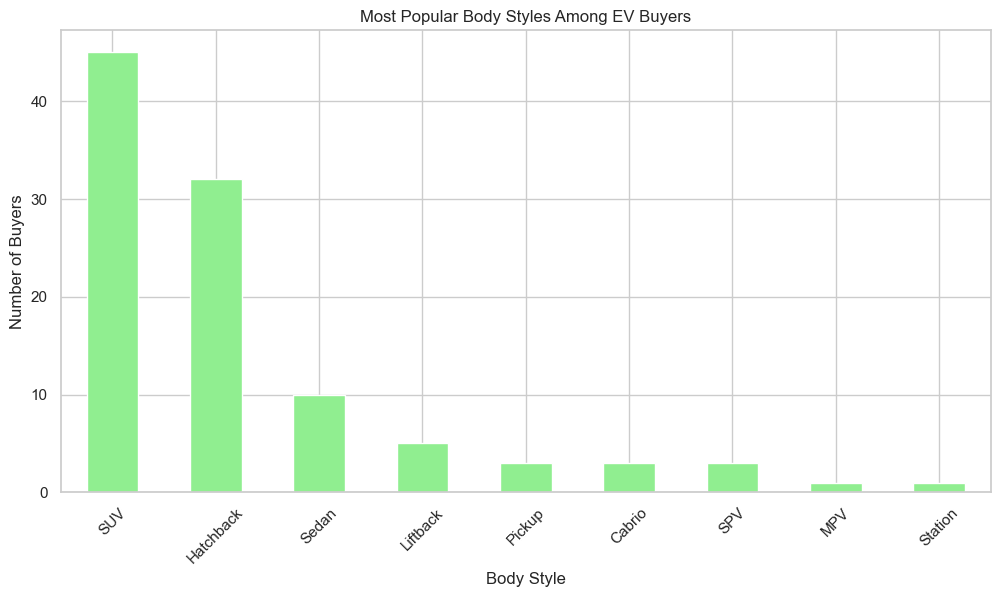

In [24]:
# Count of body styles in df3
body_style_counts = df3['BodyStyle'].value_counts()

# Plotting the most popular body styles
body_style_counts.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Most Popular Body Styles Among EV Buyers')
plt.xlabel('Body Style')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45)
plt.show()


#### Conclusion:

     The most popular body styles among EV buyers is SUV

#### Does the availability of rapid charging affect EV adoption?

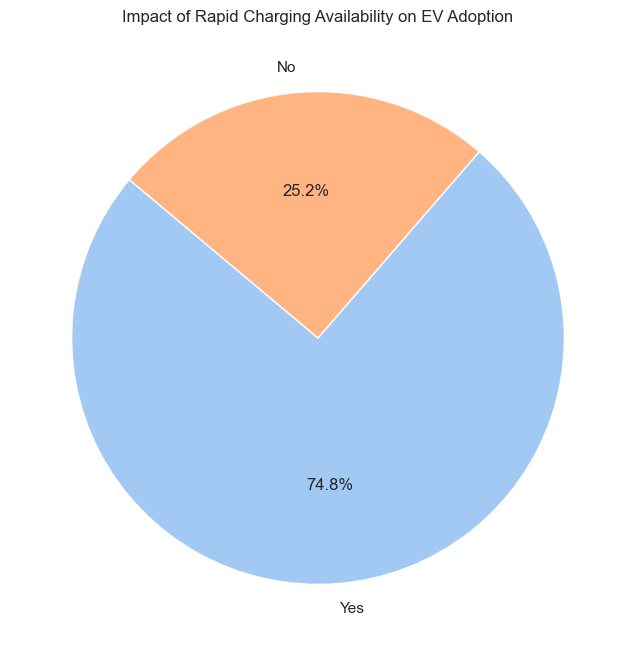

In [25]:
# Count of rapid charging availability
rapid_charge_counts = df3['RapidCharge'].value_counts()

# Plotting the impact of rapid charging on EV adoption
rapid_charge_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140, colors=sns.color_palette('pastel'))
plt.title('Impact of Rapid Charging Availability on EV Adoption')
plt.ylabel('')
plt.show()


#### What segment of EVs is most popular among consumers (e.g., luxury, mid-range, economy)?


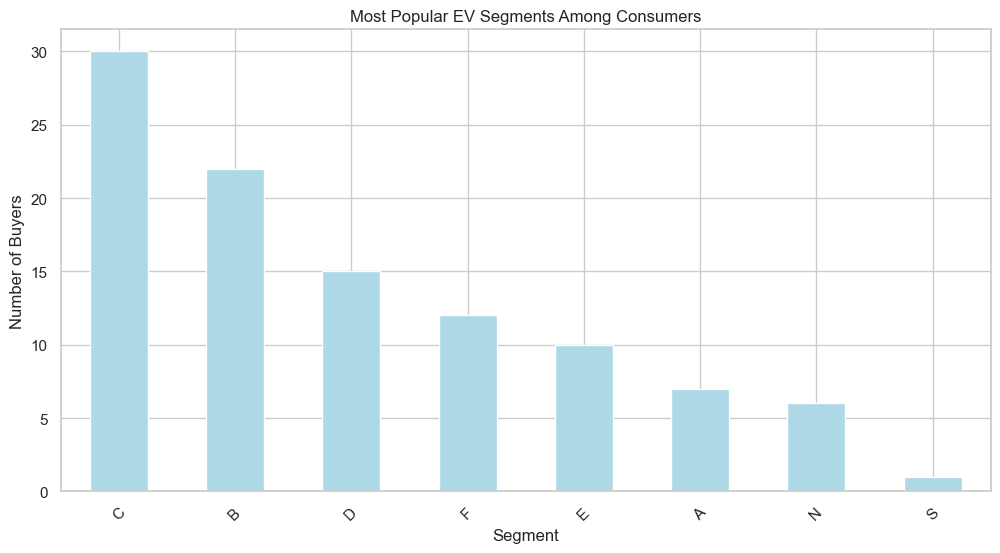

In [26]:
# Count of segments in df3
segment_counts = df3['Segment'].value_counts()

# Plotting the most popular segments
segment_counts.plot(kind='bar', figsize=(12, 6), color='lightblue')
plt.title('Most Popular EV Segments Among Consumers')
plt.xlabel('Segment')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=45)
plt.show()

## Fitting of model

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [28]:
# Select relevant features from df1 and df3
df1_selected = df1[['Age', 'Salary', 'Wife Salary', 'Total Salary', 'Price']]  # From df1
df3_selected = df3[['PriceEuro', 'Range_Km', 'AccelSec', 'TopSpeed_KmH', 'Seats', 'FastCharge_KmH']]  # From df3

# Combine the selected features into one DataFrame (if needed)
combined_df = pd.concat([df1_selected, df3_selected], axis=1)


In [29]:
# Fill missing values with mean (or other strategies as required)
combined_df.fillna(combined_df.mean(), inplace=True)


In [30]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df)


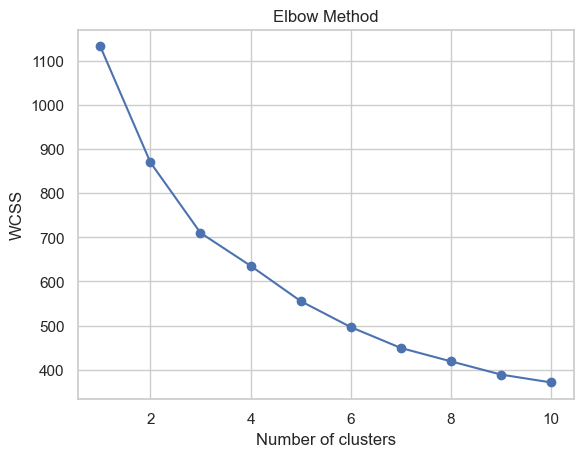

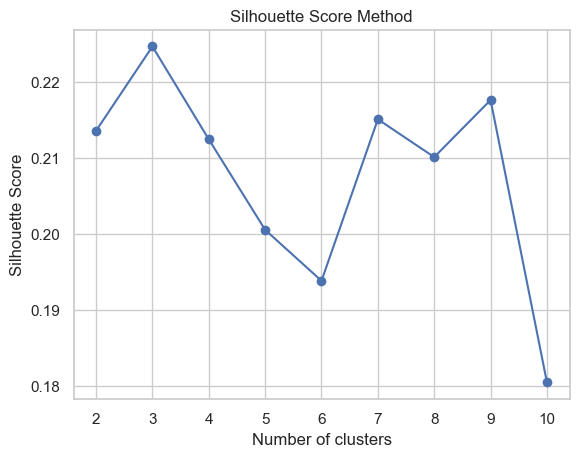

In [32]:
# Using the Elbow Method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Using Silhouette Score
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Fitting K-Means to the dataset

In [33]:
optimal_clusters = 3  # Replace with the optimal number found
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original data
combined_df['Cluster'] = cluster_labels


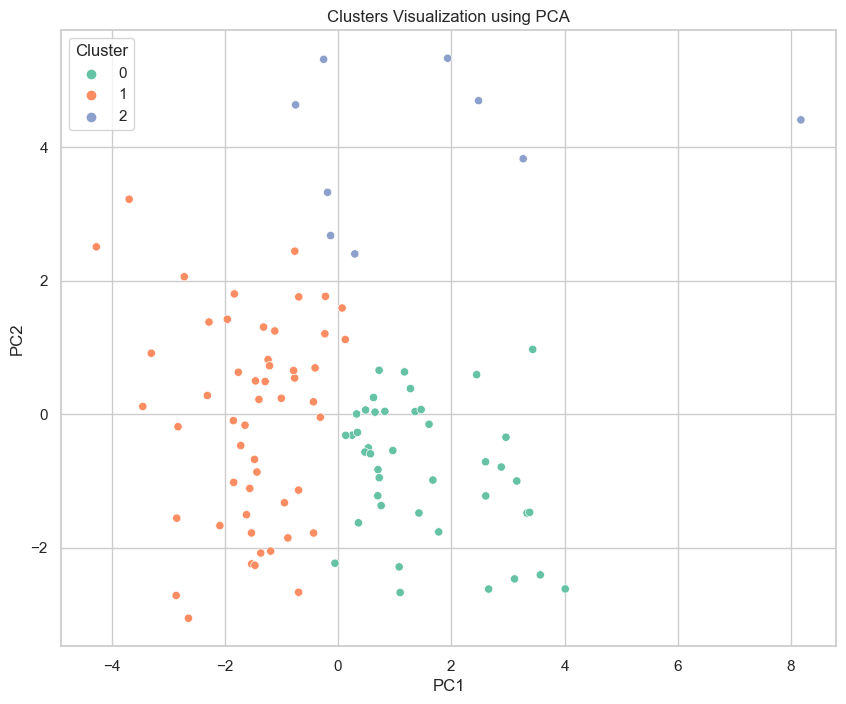

In [34]:
# Reducing dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Creating a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2')
plt.title('Clusters Visualization using PCA')
plt.show()


In [35]:
# Grouping by clusters to see the characteristics of each cluster
cluster_analysis = combined_df.groupby('Cluster').mean()
display(cluster_analysis)


,Age,Salary,Wife Salary,Total Salary,Price,PriceEuro,Range_Km,AccelSec,TopSpeed_KmH,Seats,FastCharge_KmH
Cluster,,,,,,,,,,,
0,34.339346,1.410606e+06,3.556518e+05,1.766258e+06,1.023480e+06,75079.833333,412.380952,5.259524,206.071429,5.023810,600.000000
1,36.365385,1.821154e+06,4.769231e+05,2.298077e+06,1.213462e+06,35104.730769,257.692308,9.432692,149.653846,4.730769,293.846154
2,45.222222,2.766667e+06,1.700000e+06,4.466667e+06,1.877778e+06,85532.444444,463.888889,5.600000,224.444444,5.111111,586.666667


## Final Conclusion:

   ### Cluster(0):
         This cluster seems to consist of relatively younger individuals with moderate to high income. They prefer EVs with a decent range, good acceleration, and fast charging capabilities. The price range is also mid to high, indicating they might be early adopters with a preference for well-rounded vehicles.  
          
   ### Cluster(1):
           This cluster is slightly older and has a higher income. They seem to prefer more affordable EVs with lower range, speed, and acceleration. They might be more budget-conscious or prefer EVs for shorter commutes or city driving. The price is lower, indicating a preference for more economical models.
  ### Cluster(2):
            This cluster represents older, wealthier individuals who prefer high-end EVs with superior range, speed, and acceleration. They are likely to opt for premium or luxury EVs that offer the best performance and features. The high price and powerful specs suggest they are looking for top-tier models.